## Convective rolls of active colloids in a harmonic trap

Here, we study the dynamics of spherical active colloids of radius $b$ in a harmonic trap. We consider self-propelling, polar, achiral active colloids, with non-zero values of $\mathbf{V}_{i}^{\mathcal{A}}, \mathbf{V}_{i}^{(2s)}$ and $\mathbf{V}_{i}^{(3t)}$.  With this choice, an isolated colloid translates with velocity $\mathbf{V}_{i}^{\mathcal{A}}=v_{s}\boldsymbol{p}_{i}$ while producing dipolar and quadrupolar flows of strengths proportional to $\mathbf{V}_{i}^{(2s)}$ and $\mathbf{V}_{i}^{(3t)}$ respectively.  The moment of force about the trap center is zero. Therefore, in a trap of stiffness $k$ centered at $\boldsymbol{R}_{i}^{0}$, the force and torque on the ith colloid is

$$
\mathbf{F}_{i}^{P}=-k \boldsymbol{R}_{i} ,\qquad\mathbf{T}_{i}^{P}=0.
$$

We start by ignoring hydrodynamic interactions to obtain the balance of forces and torques 

$$
-6\pi\eta b(\mathbf{V}_{i}-v_{s}\boldsymbol{p}_{i})-k\boldsymbol{R}_{i} 	=0,	\qquad-8\pi\eta b^{3}\,\mathbf{\Omega}_{i}=0.
$$

This gives the confinement radius $R^{*}=6\pi\eta bv_{s}/k=\mathcal{A}_{T}b$, when the propulsive and trap forces are balanced. This is the stable state of the system in absence of hydrodynamic interactions using PyStokes. We now study the effects of hydrodynamic interaction. More details of the model etc can be found in section V of the [paper](http://iopscience.iop.org/article/10.1088/1742-5468/2015/06/P06017/meta). 

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
import trap   
# the file 'trap.pyx' contains the main code which implements the desired model using PyStokes

## parameters
Np = 512         # number of particles
vs = 1           # self-propulsion speed
A  = 64          # a number vs/k
k  = vs/A        # stiffness of the trap

dim = 3          # dimensionality of the problem 
eta = 1.0/6      # viscosity of the fluid simulated
b   = 1          # radius of the particle     

S0, D0         = 0.01, 0.01      # strength of the stresslet and potDiple
ljrmin, ljeps  = 4, .01          # lennard-jones parameters
Tf, Npts       = 1600, 1600      # final time and number of points 


# instantiate the class trap from trap.pyx for simulation                    
rm = trap.trap(b, Np, vs, eta, dim, S0, D0, k, ljeps, ljrmin)    

In [3]:
# initialise the system
rm.initialise('sphere')

# simulate the resulting system and save data
rm.simulate(Tf, Npts)

### Load the data and plot snapshots

In [4]:
data  = sio.loadmat('Np=512_vs=1.0000_K=0.0156_s_0=0.0100.mat')
X     = data['X']
tm    = data['t']
k     = data['k']
vs    = data['vs']
Np    = data['Np']

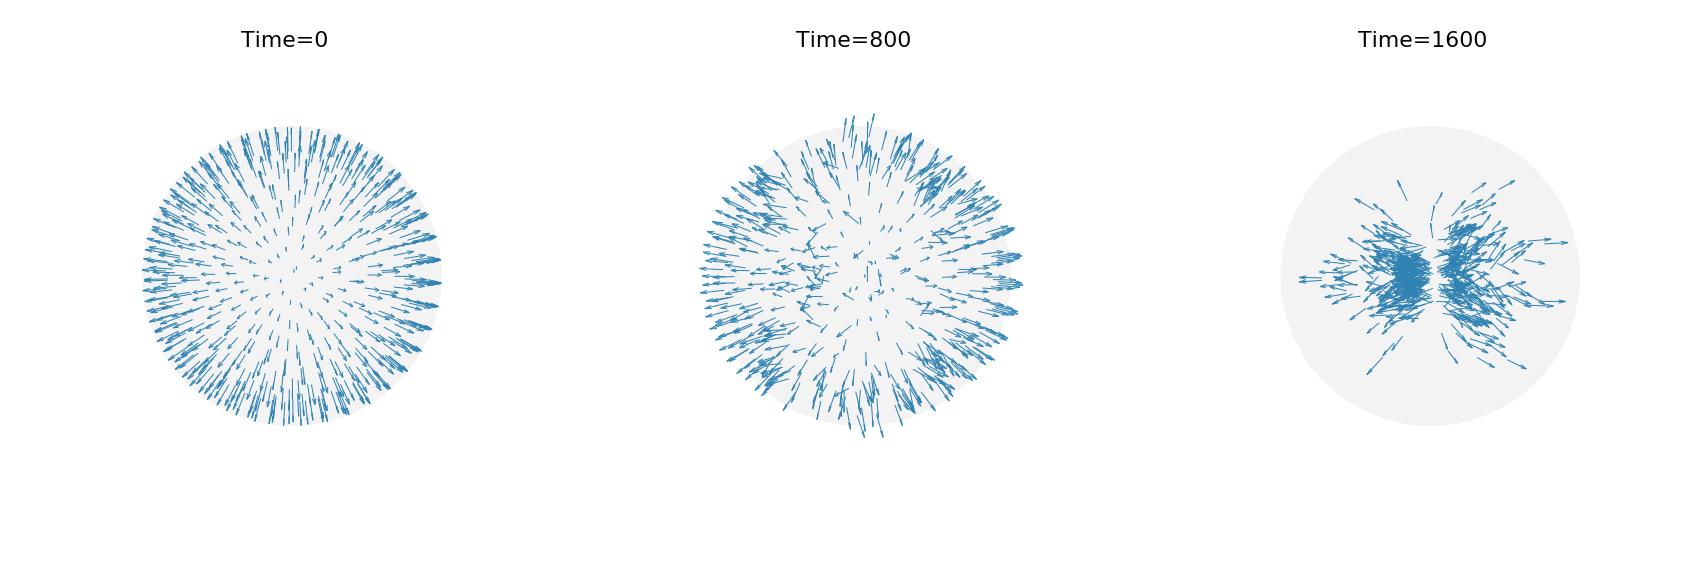

In [6]:
from mpl_toolkits.mplot3d import axes3d
rr = (6*np.pi*eta*vs*b)/k  # confinement radius
fig = plt.figure(figsize=(24, 8))


def plotConfig(n, n_):
    ax = fig.add_subplot(1, 3, n_, projection='3d', )
    phi   = np.linspace(0, 2 * np.pi, 100)
    theta = np.linspace(0, np.pi, 100)
    x = rr * np.outer(np.cos(phi), np.sin(theta))
    y = rr * np.outer(np.sin(phi), np.sin(theta))
    z = rr * np.outer(np.ones(np.size(phi)), np.cos(theta))
    ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='k', linewidth=0, alpha=0.024)

    for i in range(Np):
        x, y, z    = X[n,i], X[n,Np+i], X[n,2*Np+i]
        px, py, pz = X[n,3*Np+i], X[n,4*Np+i], X[n,5*Np+i]
        qq = ax.quiver(x, y, z, px, py, pz, length=32, color='#348abd')   
    ax.set_xlim([-rr,rr]); ax.set_ylim([-rr,rr]); ax.set_zlim([-rr,rr]);
    plt.title('Time=%d'%n, fontsize=22); plt.axis('off'); ax.set_aspect("equal"); plt.tight_layout()


plotConfig(0, 1)
plotConfig(800, 2)
plotConfig(1600, 3)